In [211]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [499]:
import pandas as pd
import seaborn as sns
import numpy as np
from utils import *
from category_encoders import MEstimateEncoder
from sklearn.model_selection import train_test_split

In [500]:
dataset_df = pd.read_csv('cleaned_dataset.csv')
dataset_df.drop(columns="Flooring", inplace=True)
dataset_df.shape

(4061, 29)

In [501]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4061 entries, 0 to 4060
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              4061 non-null   object 
 1   Price             4061 non-null   float64
 2   Location          4061 non-null   object 
 3   Area              4061 non-null   int64  
 4   Rooms             4061 non-null   int64  
 5   Bathrooms         4061 non-null   int64  
 6   Condition         4061 non-null   object 
 7   Air conditioning  4061 non-null   object 
 8   Garden            4061 non-null   object 
 9   Heating           4061 non-null   object 
 10  Furnished         4061 non-null   object 
 11  Equipped kitchen  4061 non-null   object 
 12  Double glazing    4061 non-null   object 
 13  Security system   4061 non-null   object 
 14  Terrace           4061 non-null   object 
 15  Elevator          4061 non-null   object 
 16  Satellite dish    4061 non-null   object 


In [502]:
dataset_df.describe().round(2)

,Price,Area,Rooms,Bathrooms
count,4061.00,4061.00,4061.00,4061.00
mean,2603.82,209.82,2.64,1.88
std,1958.24,236.16,1.27,1.08
min,110.00,11.00,1.00,1.00
25%,1200.00,96.00,2.00,1.00
50%,1900.00,135.00,3.00,2.00
75%,3500.00,220.00,3.00,2.00
max,10000.00,4400.00,14.00,12.00


In [503]:
data = dataset_df[dataset_df['Area'] == 10000]
data.head(10)

,Type,Price,Location,Area,Rooms,Bathrooms,Condition,Air conditioning,Garden,Heating,...,Internet,Garage,Pool,Concierge,Reinforced Door,Microwave,Fridge,TV,Washing machine,Sea views


In [504]:
dataset_df = dataset_df.drop([8, 3977])

data = dataset_df[dataset_df['Area'] == 10000]

data.head()

,Type,Price,Location,Area,Rooms,Bathrooms,Condition,Air conditioning,Garden,Heating,...,Internet,Garage,Pool,Concierge,Reinforced Door,Microwave,Fridge,TV,Washing machine,Sea views


In [505]:
price_column = dataset_df.pop('Price')  
dataset_df['Price'] = price_column
dataset_df

,Type,Location,Area,Rooms,Bathrooms,Condition,Air conditioning,Garden,Heating,Furnished,...,Garage,Pool,Concierge,Reinforced Door,Microwave,Fridge,TV,Washing machine,Sea views,Price
0,apartment,La Marsa,180,3,3,Good condition,yes,no,yes,no,...,yes,no,yes,no,no,no,no,no,yes,3500.0
1,apartment,Yasmine Hammamet,160,2,2,New,yes,yes,yes,yes,...,no,yes,yes,no,no,no,no,no,no,2500.0
2,apartment,Hammamet Nord,100,2,2,New,yes,no,yes,yes,...,no,no,no,no,no,no,no,no,no,1500.0
3,house,La Marsa,800,5,3,Good condition,yes,yes,yes,no,...,yes,no,no,no,no,no,no,no,no,5000.0
4,house,El Menzah 7,800,9,4,Good condition,yes,yes,yes,no,...,yes,no,no,no,no,no,no,no,no,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056,apartment,La Marsa,90,1,1,Good condition,no,no,yes,yes,...,no,no,no,yes,yes,yes,yes,yes,no,1600.0
4057,apartment,Yasmine Hammamet,100,2,1,Good condition,no,no,yes,yes,...,no,no,no,no,yes,yes,yes,no,no,1350.0
4058,apartment,Ain Zaghouan Sud,85,1,1,Good condition,no,no,no,no,...,no,no,no,no,no,no,no,no,no,750.0
4059,apartment,Les Jardins de Carthage,73,1,1,New,yes,yes,yes,yes,...,yes,no,yes,yes,yes,yes,yes,yes,no,1700.0


In [506]:
X = dataset_df.iloc[:, :-1]
Y = dataset_df.iloc[:, -1]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4059 entries, 0 to 4060
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Type              4059 non-null   object
 1   Location          4059 non-null   object
 2   Area              4059 non-null   int64 
 3   Rooms             4059 non-null   int64 
 4   Bathrooms         4059 non-null   int64 
 5   Condition         4059 non-null   object
 6   Air conditioning  4059 non-null   object
 7   Garden            4059 non-null   object
 8   Heating           4059 non-null   object
 9   Furnished         4059 non-null   object
 10  Equipped kitchen  4059 non-null   object
 11  Double glazing    4059 non-null   object
 12  Security system   4059 non-null   object
 13  Terrace           4059 non-null   object
 14  Elevator          4059 non-null   object
 15  Satellite dish    4059 non-null   object
 16  Oven              4059 non-null   object
 17  Mountains views   4

In [507]:
X.columns

Index(['Type', 'Location', 'Area', 'Rooms', 'Bathrooms', 'Condition',
       'Air conditioning', 'Garden', 'Heating', 'Furnished',
       'Equipped kitchen', 'Double glazing', 'Security system', 'Terrace',
       'Elevator', 'Satellite dish', 'Oven', 'Mountains views', 'Internet',
       'Garage', 'Pool', 'Concierge', 'Reinforced Door', 'Microwave', 'Fridge',
       'TV', 'Washing machine', 'Sea views'],
      dtype='object')

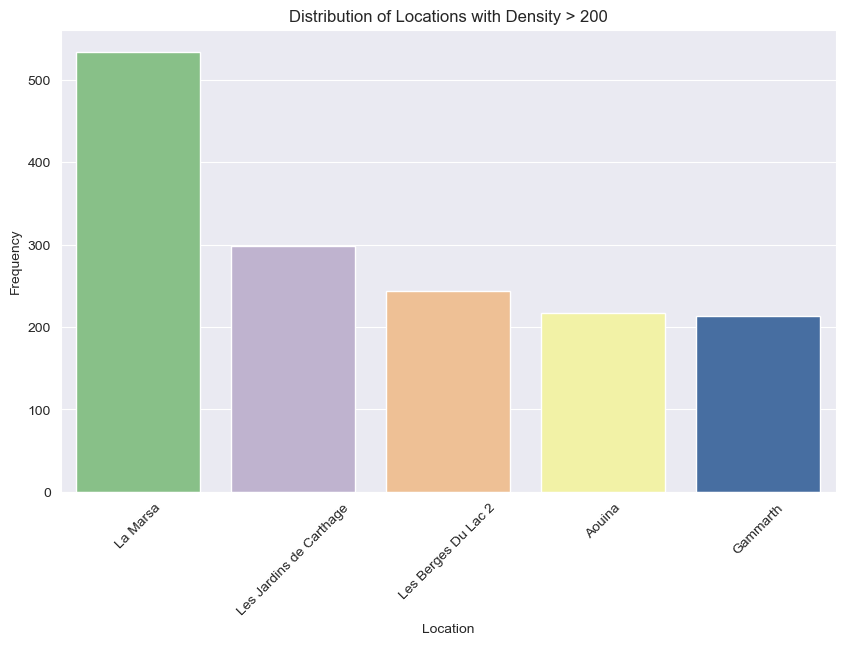

In [508]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dataset_df is your DataFrame and 'Location' is the column containing locations
location_distribution = dataset_df['Location'].value_counts()

# Filter locations where density is above 200
high_density_locations = location_distribution[location_distribution > 200]

# Plot the distribution for high density locations
plt.figure(figsize=(10, 6))
sns.barplot(x=high_density_locations.index, y=high_density_locations.values)
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Distribution of Locations with Density > 200')
plt.show()


Text(0.5, 0, 'Area')

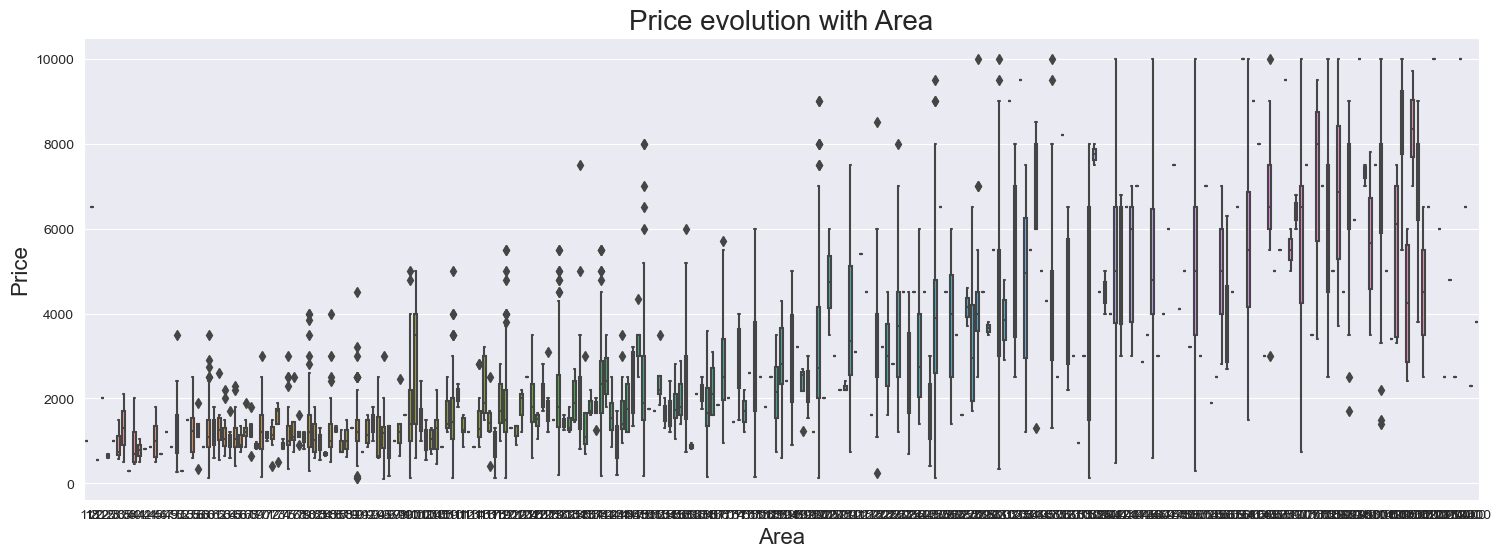

In [509]:
sns.set_palette("Accent")
sns.set_style("darkgrid")
ax = sns.boxplot(y = 'Price', x = 'Area', data = dataset_df, orient='v', width=0.5)
ax.figure.set_size_inches(18, 6) 
ax.set_title('Price evolution with Area', fontsize=20) 
ax.set_ylabel('Price', fontsize=16)
ax.set_xlabel('Area', fontsize = 16) 

C:\Users\MSI\AppData\Local\Temp\ipykernel_23608\3634248461.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset_df.Price)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Prices')

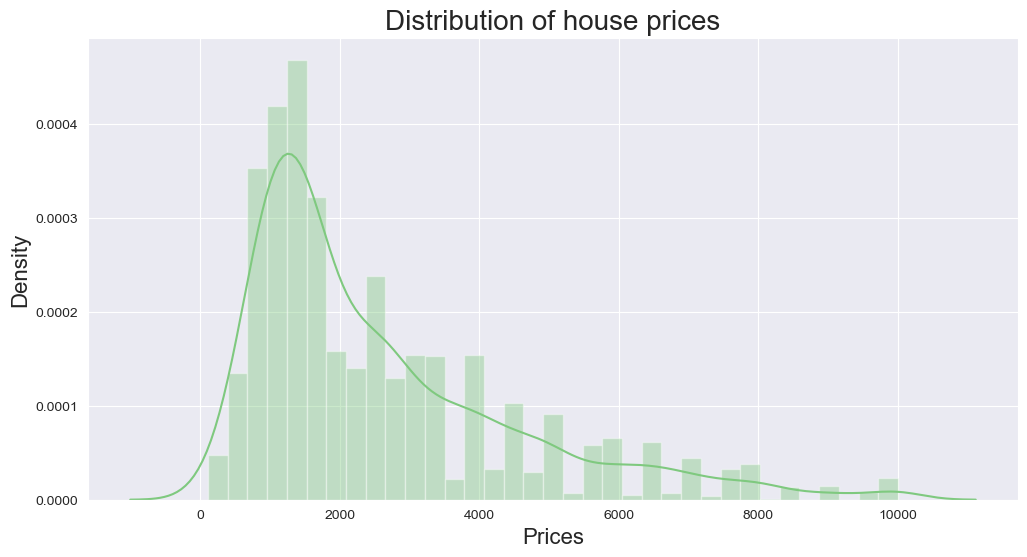

In [510]:
ax = sns.distplot(dataset_df.Price)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribution of house prices', fontsize=20)
ax.set_ylabel('Density', fontsize=16) 
ax.set_xlabel('Prices', fontsize = 16) 

In [511]:
encoder = MEstimateEncoder(cols=['Type', 'Location', 'Condition',
       'Air conditioning', 'Garden', 'Heating', 'Furnished',
       'Equipped kitchen', 'Double glazing', 'Security system', 'Terrace',
       'Elevator', 'Satellite dish', 'Oven', 'Mountains views', 'Internet',
       'Garage', 'Pool', 'Concierge', 'Reinforced Door', 'Microwave', 'Fridge',
       'TV', 'Washing machine', 'Sea views'], m=0.5)

X = encoder.fit_transform(X, Y)


In [512]:

dataset_df = X.join(Y)
dataset_df.info()
dataset_df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 4059 entries, 0 to 4060
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              4059 non-null   float64
 1   Location          4059 non-null   float64
 2   Area              4059 non-null   int64  
 3   Rooms             4059 non-null   int64  
 4   Bathrooms         4059 non-null   int64  
 5   Condition         4059 non-null   float64
 6   Air conditioning  4059 non-null   float64
 7   Garden            4059 non-null   float64
 8   Heating           4059 non-null   float64
 9   Furnished         4059 non-null   float64
 10  Equipped kitchen  4059 non-null   float64
 11  Double glazing    4059 non-null   float64
 12  Security system   4059 non-null   float64
 13  Terrace           4059 non-null   float64
 14  Elevator          4059 non-null   float64
 15  Satellite dish    4059 non-null   float64
 16  Oven              4059 non-null   float64
 17  

,Type,Location,Area,Rooms,Bathrooms,Condition,Air conditioning,Garden,Heating,Furnished,...,Garage,Pool,Concierge,Reinforced Door,Microwave,Fridge,TV,Washing machine,Sea views,Price
0,2008.245649,3534.504536,180,3,3,2658.734646,2777.00185,2098.161207,2720.824378,2660.344743,...,3373.183370,2161.456536,2480.545305,2379.776927,2436.727137,2548.295252,2670.568091,2558.43046,3737.228835,3500.0
1,2008.245649,2194.964880,160,2,2,2505.191311,2777.00185,3859.487054,2720.824378,2495.822023,...,1983.133989,4561.570133,2480.545305,2379.776927,2436.727137,2548.295252,2670.568091,2558.43046,2463.242224,2500.0
2,2008.245649,1666.248137,100,2,2,2505.191311,2777.00185,2098.161207,2720.824378,2495.822023,...,1983.133989,2161.456536,2680.418831,2379.776927,2436.727137,2548.295252,2670.568091,2558.43046,2463.242224,1500.0
3,3609.916921,3534.504536,800,5,3,2658.734646,2777.00185,3859.487054,2720.824378,2660.344743,...,3373.183370,2161.456536,2680.418831,2379.776927,2436.727137,2548.295252,2670.568091,2558.43046,2463.242224,5000.0
4,3609.916921,1966.826161,800,9,4,2658.734646,2777.00185,3859.487054,2720.824378,2660.344743,...,3373.183370,2161.456536,2680.418831,2379.776927,2436.727137,2548.295252,2670.568091,2558.43046,2463.242224,6000.0


In [513]:
# Define the columns you want to use in your model
selected_columns = ['Type', 'Location', 'Area','Rooms','Bathrooms','Garden','Pool','Garage']  # Add other columns you want to include

# Select the desired columns from the dataset
X = dataset_df[selected_columns]


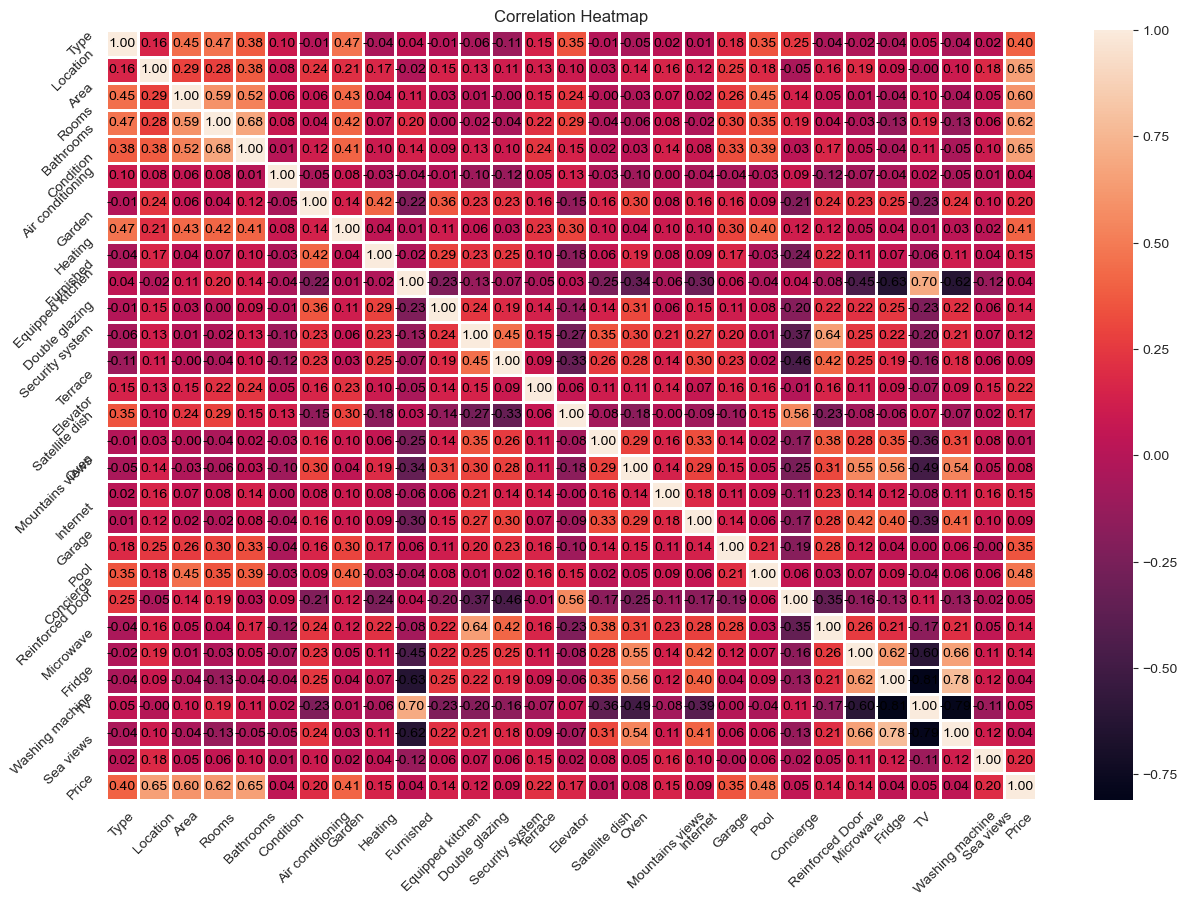

In [529]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = dataset_df.corr().round(2)

# Plot heatmap
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
ax = sns.heatmap(corr, annot=False, cmap='rocket', linewidths=1, linecolor='white', cbar=True)

# Add text annotations for correlation values
for i in range(len(corr)):
    for j in range(len(corr.columns)):
        text = f"{corr.iloc[i, j]:.2f}"
        ax.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black')

plt.title('Correlation Heatmap')  # Add a title to the heatmap
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=45)  # Rotate y-axis labels for better visibility
plt.show()




In [515]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2 , random_state = 0)
len(Y_test)

812

                  Type  Location  Area  Rooms  Bathrooms  Condition  \
Type              1.00      0.16  0.45   0.47       0.38       0.10   
Location          0.16      1.00  0.29   0.28       0.38       0.08   
Area              0.45      0.29  1.00   0.59       0.52       0.06   
Rooms             0.47      0.28  0.59   1.00       0.68       0.08   
Bathrooms         0.38      0.38  0.52   0.68       1.00       0.01   
Condition         0.10      0.08  0.06   0.08       0.01       1.00   
Air conditioning -0.01      0.24  0.06   0.04       0.12      -0.05   
Garden            0.47      0.21  0.43   0.42       0.41       0.08   
Heating          -0.04      0.17  0.04   0.07       0.10      -0.03   
Furnished         0.04     -0.02  0.11   0.20       0.14      -0.04   
Equipped kitchen -0.01      0.15  0.03   0.00       0.09      -0.01   
Double glazing   -0.06      0.13  0.01  -0.02       0.13      -0.10   
Security system  -0.11      0.11 -0.00  -0.04       0.10      -0.12   
Terrac

In [516]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [517]:
print('R² = {}'.format(regressor.score(X_train, Y_train).round(2)))

R² = 0.73


In [518]:
Y_pred = regressor.predict(X_test) 
print('R² = %s' %metrics.r2_score(Y_test, Y_pred).round(2))

R² = 0.7


In [525]:
MSE = metrics.mean_squared_error(Y_test, Y_pred).round(2)
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)).round(2)
R2 = metrics.r2_score(Y_test, Y_pred).round(2)

pd.DataFrame([MSE, RMSE, R2], ['mse', 'mseS', 'R²'], columns=['Metrics'])

,Metrics
mse,1126419.03
mseS,1061.33
R²,0.70


In [526]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, Y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_mse = mean_squared_error(Y_test, random_forest_pred)
random_forest_r2 = r2_score(Y_test, random_forest_pred)
print("Random Forest MSE:", random_forest_mse)
print("Random Forest R²:", random_forest_r2)


Random Forest MSE: 927818.8639959033
Random Forest R²: 0.7510579292703802


In [527]:
import joblib
joblib.dump(random_forest_model,'ML_Model.pkl')

['ML_Model.pkl']

In [528]:
dataset_df.to_csv("CleanData.csv", index=False)

In [524]:
dataset_df.to_csv("hhhhData.csv", index=False)